In [1]:
import os
import sys
os.chdir("../../")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.text.epu import *

In [2]:
target_dir = os.getcwd() + "/outputs/text/png/"

epu_df = pd.DataFrame()
filepaths = [
    os.getcwd() + "/data/text/png/post_courier_news.csv",
    os.getcwd() + "/data/text/abc_au/papua_new_guinea_abc_news.csv",
    os.getcwd() + "/data/text/rnz/papua_new_guinea_rnz_news.csv"
]
for i, nn in zip(filepaths, ["post_courier", "abc_au", "rnz"]):
    epu = EPU(filepath=i)
    epu.get_epu_category()
    temp = epu.get_epu_stats(cutoff="2020-01-01")
    temp.columns = [
        str(nn) + "_" + col if col not in ["date"] else col
        for col in temp.columns
    ]
    if epu_df.empty:
        epu_df = temp
    else:
        epu_df = epu_df.merge(temp, how="outer", on=["date"])

In [5]:
epu_df

,date,post_courier_news_count,post_courier_epu_count,post_courier_ratio,post_courier_z_score,abc_au_news_count,abc_au_epu_count,abc_au_ratio,abc_au_z_score,rnz_news_count,rnz_epu_count,rnz_ratio,rnz_z_score,z_score,epu_index
0,2003-02-01,0.0,0.0,0.000000,0.000000,4.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,2003-03-01,0.0,0.0,0.000000,0.000000,11.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,2003-04-01,0.0,0.0,0.000000,0.000000,11.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,2003-05-01,0.0,0.0,0.000000,0.000000,15.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,2003-06-01,0.0,0.0,0.000000,0.000000,13.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2023-05-01,136.0,1.0,0.007353,0.662847,12.0,3.0,0.250000,2.961807,8.0,0.0,0.000000,0.000000,1.812327,376.350050
244,2023-06-01,147.0,0.0,0.000000,0.000000,13.0,1.0,0.076923,0.911325,9.0,0.0,0.000000,0.000000,0.455663,94.623467
245,2023-07-01,81.0,1.0,0.012346,1.112928,10.0,0.0,0.000000,0.000000,9.0,0.0,0.000000,0.000000,0.556464,115.555980
246,2023-08-01,0.0,0.0,0.000000,0.000000,9.0,2.0,0.222222,2.632717,8.0,0.0,0.000000,0.000000,1.316359,273.356682


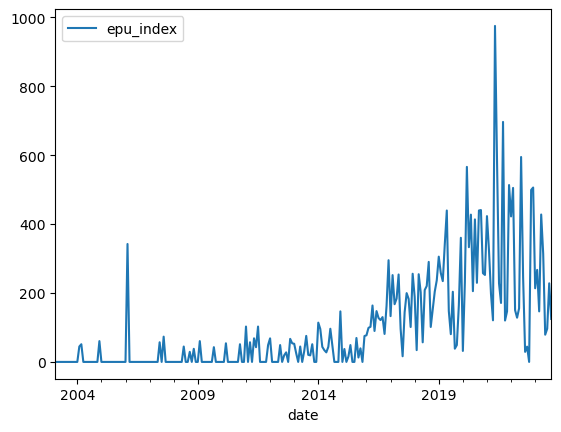

In [8]:
epu_df = epu_df.sort_values(by="date").reset_index(drop=True).fillna(0)
epu_df["z_score"] = epu_df[["abc_au_z_score", "post_courier_z_score", "rnz_z_score"]].mean(axis=1)
scale_factor = 100/epu_df["z_score"].mean()
epu_df["epu_index"] = epu_df["z_score"] * scale_factor
epu_df.plot(x="date", y="epu_index");

In [7]:
if os.path.exists(target_dir):
    epu_df.to_csv(target_dir + "png_epu.csv", encoding="utf-8")